<font color = darkblue>
    
## Objective

- Explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business.


## Data Dictionary 

- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# 1. Loading libraries

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api   as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing   import LabelEncoder
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.metrics         import mean_squared_error
from sklearn.preprocessing   import StandardScaler
from sklearn.impute          import SimpleImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# 2. Loading and exploring the data

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [2]:
# Read the data from CSV 
df = pd.read_csv('/Users/sundeep/Learnings/1_PGP_DSBA/Project/6_Cars4U/used_cars_data.csv',index_col=0)

In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=5)

There are 7253 rows and 13 columns in the dataset.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34


- Looking at these 10 random samples , it looks like we have missing values
- NAN in New_Price column that means to say we have missing values in the dataset. 
- Milage , Engine , Power and New_Price are supposed to be transformed to float values.
- kmpl , CC , bhp and Lakh is supposed to be trimmed from the variables.

In [4]:
# Basic information of the data before any preprocessing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


- New Price is Object , it should be of data type float
- Power , Engine , Mileage should be converted to numeric after processing the data

In [5]:
# Value count of the data
df.value_counts()

Name                                 Location   Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage     Engine   Power       Seats  New_Price   Price
Volvo V40 D3 R Design                Hyderabad  2015  38000              Diesel     Automatic     Second      16.8 kmpl   1969 CC  150 bhp     5.0    37.9 Lakh   24.00    1
Hyundai Xcent 1.2 CRDi S             Kolkata    2016  26000              Diesel     Manual        First       25.4 kmpl   1186 CC  73.97 bhp   5.0    8.23 Lakh   5.00     1
Jaguar XE 2.0L Diesel Prestige       Delhi      2018  1000               Diesel     Automatic     First       13.6 kmpl   1999 CC  177 bhp     5.0    52.77 Lakh  40.00    1
Isuzu MUX 4WD                        Jaipur     2017  34429              Diesel     Automatic     First       13.8 kmpl   2999 CC  174.57 bhp  7.0    33.68 Lakh  20.00    1
Hyundai i20 Active SX Petrol         Jaipur     2017  40250              Petrol     Manual        First       17.19 kmpl  1197 CC  81.86 bhp

In [6]:
# Check for duplicate values
df.duplicated()

S.No.
0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Length: 7253, dtype: bool

- It looks like we do not have duplicates in the data

In [7]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

- Power and Engine are blank for some cars , may be these belongs to same car.
- New_Price may not be required for modelling I believe , that column can be dropped latter. 
- Price has 1234 missing values and that has to be imputed before the execution of model.
- Seats has 53 missing values , that also has to be imputed with Median

# 3. Processing columns

I want to get summary statistics and start getting a sense of the distributions of these variables and how they relate to each other, but first I need to turn many of these into numeric columns.

### Columns containing KM/Kg and KMPL

Mileage column represents Float values , but these are considered as Objects.First I want to detect which columns fit this pattern, and then I'll turn these into numbers. 

In [8]:
# Data Cleaning

df['Mileage'] = df['Mileage'].str.strip(' kmpl')
df['Mileage'] = df['Mileage'].str.strip(' km/kg')
df['Engine']  = df['Engine'].str.strip(' CC')
df['Power']   = df['Power'].str.strip(' bhp')
df['New_Price']   = df['New_Price'].str.strip(' Lakh')
df['New_Price']   = df['New_Price'].str.strip(' Cr')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


- Engine has CC string available , So removing it for the model and analysis
- Power has bhp string available , So removing it for the model and analysis
- Name column has model and company of the car , splitting the data such that later these can be used

In [9]:
# Change of datatype to Category

df['Location']      = df.Location.astype('category')
df['Fuel_Type']     = df.Fuel_Type.astype('category')
df['Transmission']  = df.Transmission.astype('category')
df['Owner_Type']    = df.Owner_Type.astype('category')

# Conversion of objects to Numeric
df['Year']        = pd.to_numeric(df['Year'], errors='coerce')
df['Year']        = pd.to_numeric(df['Year'], errors='coerce')
df['Mileage']     = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine']      = pd.to_numeric(df['Engine'], errors='coerce')
df['Power']       = pd.to_numeric(df['Power'], errors='coerce')
df['Seats']       = pd.to_numeric(df['Seats'], errors='coerce')
df['New_Price']   = pd.to_numeric(df['New_Price'], errors='coerce')

In [10]:
# high level verification of data after removing the unwanted strings
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display 3 numbers in digits
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000,7253.000,7251.000,7207.000,7078.000,7200.000,1006.000,6019.000
mean,2013.365,58699.063,18.142,1616.573,112.765,5.280,19.894,9.479
std,3.254,84427.721,4.562,595.285,53.494,0.812,19.814,11.188
min,1996.000,171.000,0.000,72.000,34.200,0.000,1.000,0.440
25%,2011.000,34000.000,15.170,1198.000,75.000,5.000,7.635,3.500
50%,2014.000,53416.000,18.160,1493.000,94.000,5.000,11.270,5.640
75%,2016.000,73000.000,21.100,1968.000,138.100,5.000,23.640,9.950
max,2019.000,6500000.000,33.540,5998.000,616.000,10.000,99.920,160.000


- Kilimeters Driven and Engine has high value of standard deviation , that means values has skewness
- Year starts from 1996 to 2019
- Minimum mileage is 0 , which indicates we do have zeros in the data.

In [12]:
# Category datatype count

df.describe(include=['category'])

,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253
unique,11,5,2,4
top,Mumbai,Diesel,Manual,First
freq,949,3852,5204,5952


In [13]:
# Object datatype count

df.describe(include=['object'])

,Name
count,7253
unique,2041
top,Mahindra XUV500 W8 2WD
freq,55


In [14]:
# Data type of the variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(4), float64(6), int64(2), object(1)
memory usage: 595.8+ KB


# 4. EDA

- Understand the data and its distributions

In [15]:
# looking at value counts for non-numeric features
num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n') # just for more space between 

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.


Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


Manual       5204
Automatic    2049
Name: Transmission, dtype: int64


First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64




In [16]:
# looking at value counts for non-numeric features
num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n') # just for more space between 

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda City 1.5 V MT           32
Honda Brio S MT               32
Hyundai Grand i10 Sportz      32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.




In [17]:
# Mean value
df.mean()

Year                 2013.365
Kilometers_Driven   58699.063
Mileage                18.142
Engine               1616.573
Power                 112.765
Seats                   5.280
New_Price              19.894
Price                   9.479
dtype: float64

In [18]:
# Median value
df.median()

Year                 2014.000
Kilometers_Driven   53416.000
Mileage                18.160
Engine               1493.000
Power                  94.000
Seats                   5.000
New_Price              11.270
Price                   5.640
dtype: float64

In [19]:
# Check the unique values in each column of the dataframe.
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [20]:
# Function for  Histogram and boxplot to analyze each and every variable
def hist_box(feature,figsize=(15,10),bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.20, .80)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True) # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, rug=True,ax=ax_hist2, bins=bins,color='g') if bins else sns.distplot(feature, kde=True,rug=True,ax=ax_hist2,color='r') # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

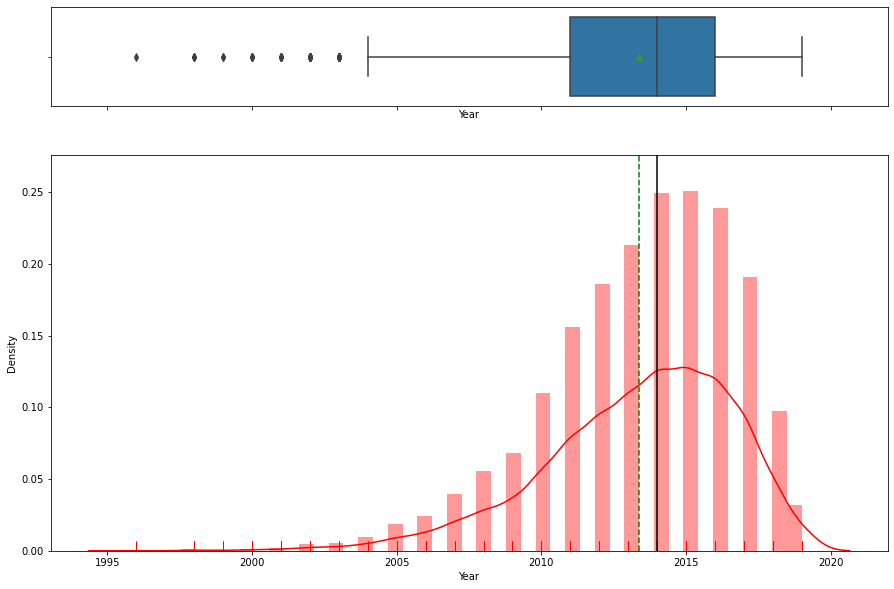

In [21]:
hist_box(df.Year)

- Majority of the cars are from 2014 and 2015
- Year has left skew , lot of data points are towards the left side.
- Data transformation is required

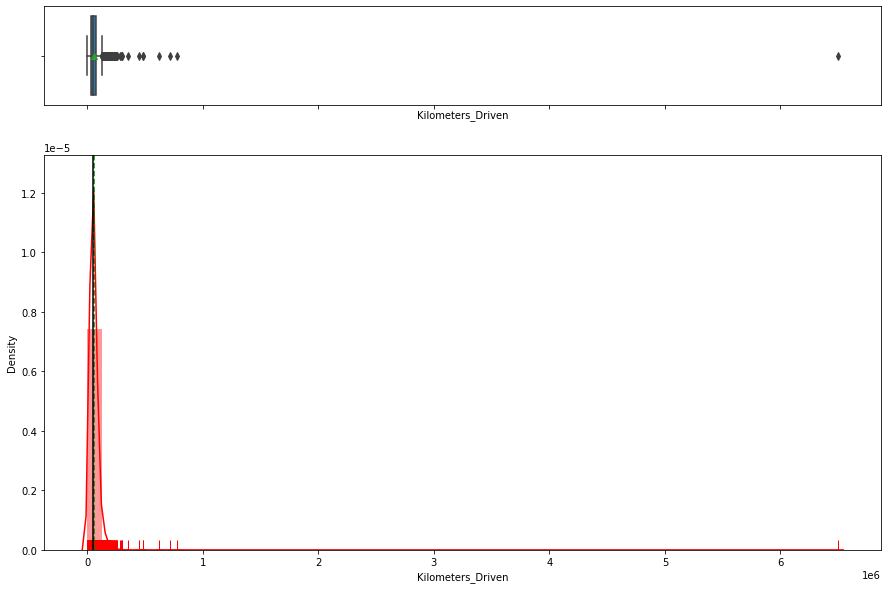

In [22]:
hist_box(df.Kilometers_Driven)

- We have good amount of outlayers in the data

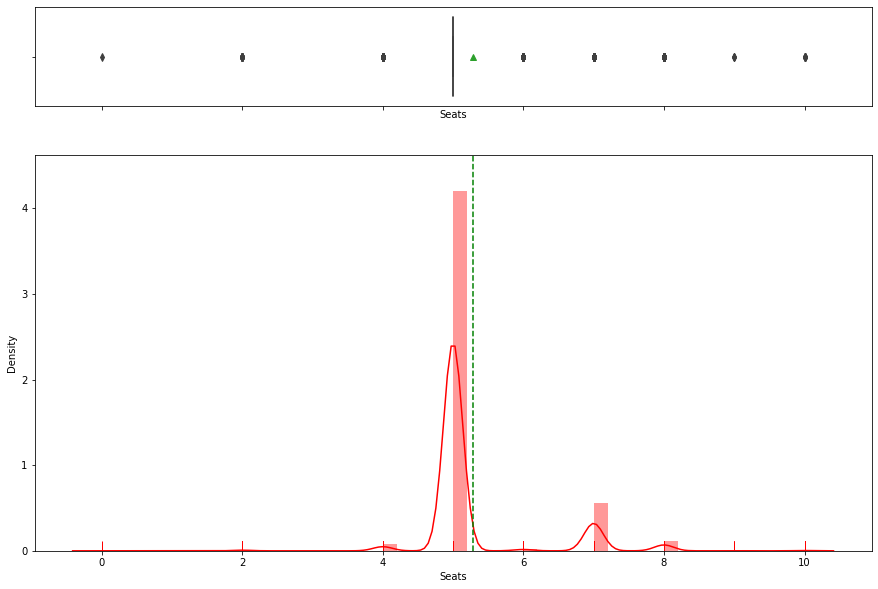

In [23]:
hist_box(df.Seats)

- Distribution of the data looks very normal.
- Majority of the cars has 5 seats

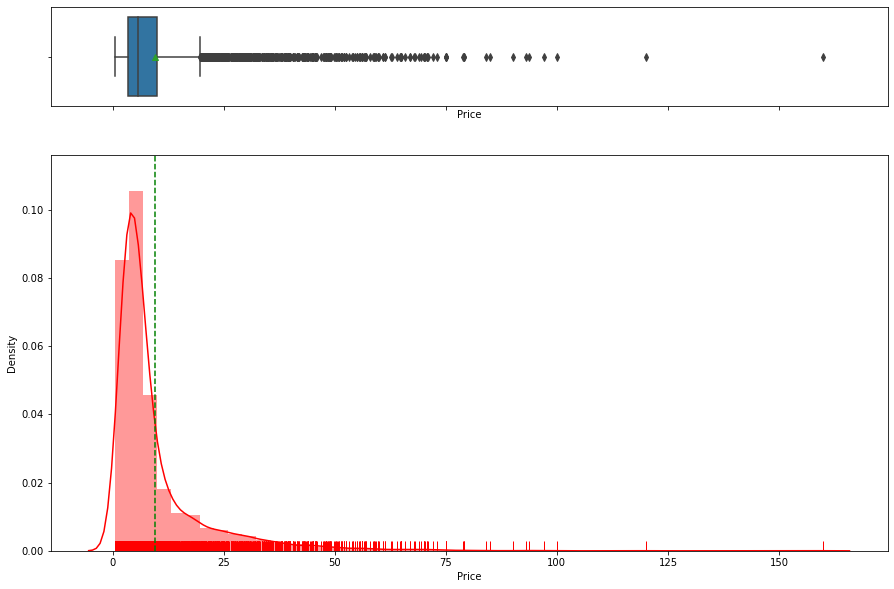

In [24]:
hist_box(df.Price)

- Price has right skew data , so data transformation is required

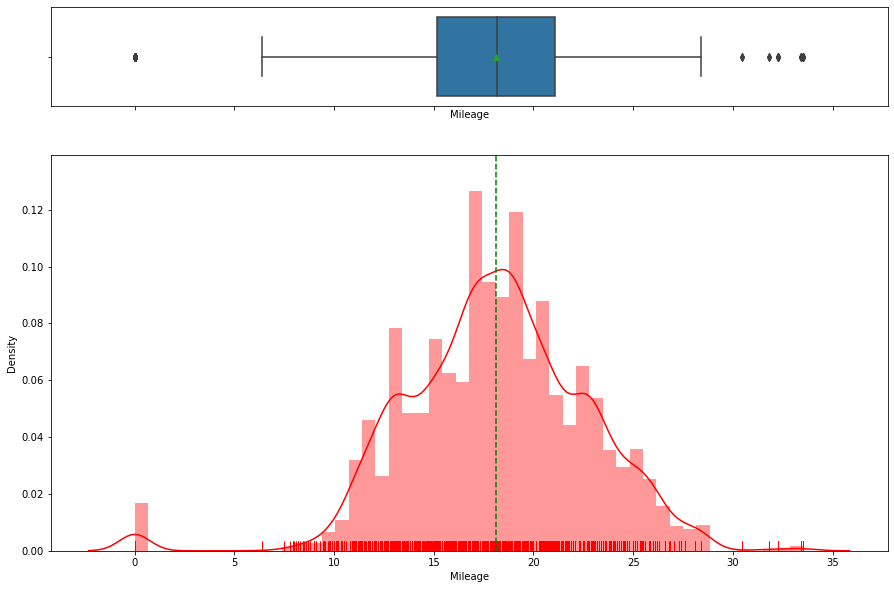

In [25]:
hist_box(df.Mileage)

- Mileage looks normal distribution.

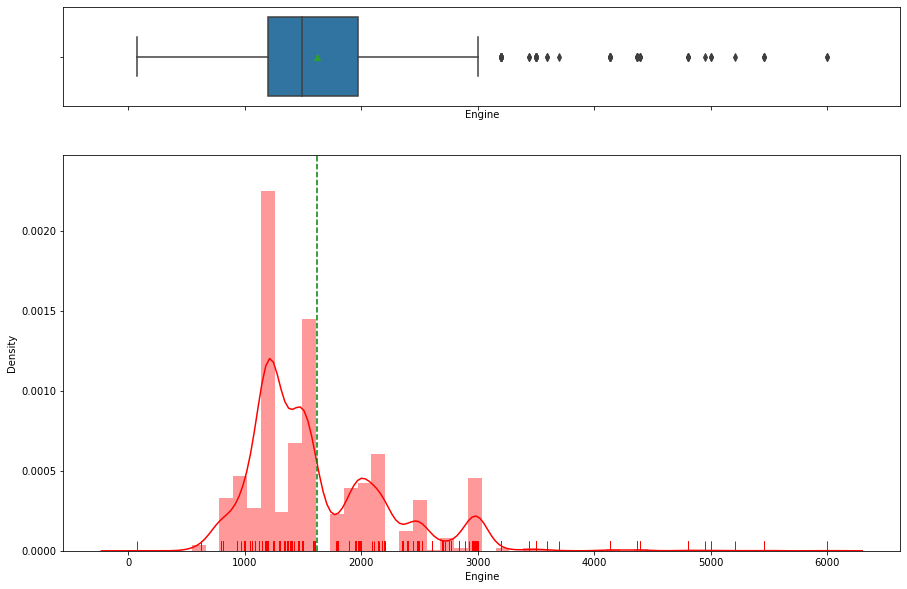

In [26]:
hist_box(df.Engine)

- Engine do have right skew data

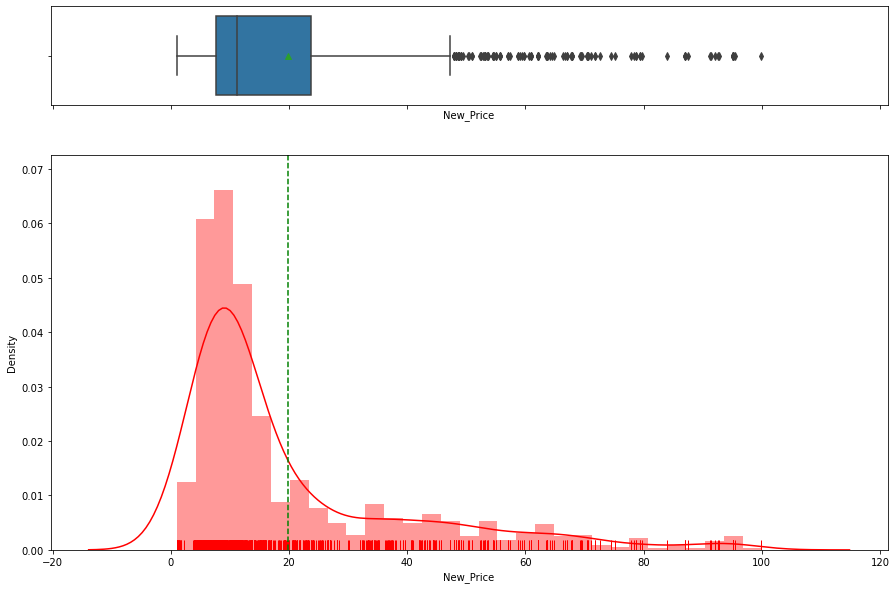

In [27]:
hist_box(df.New_Price)

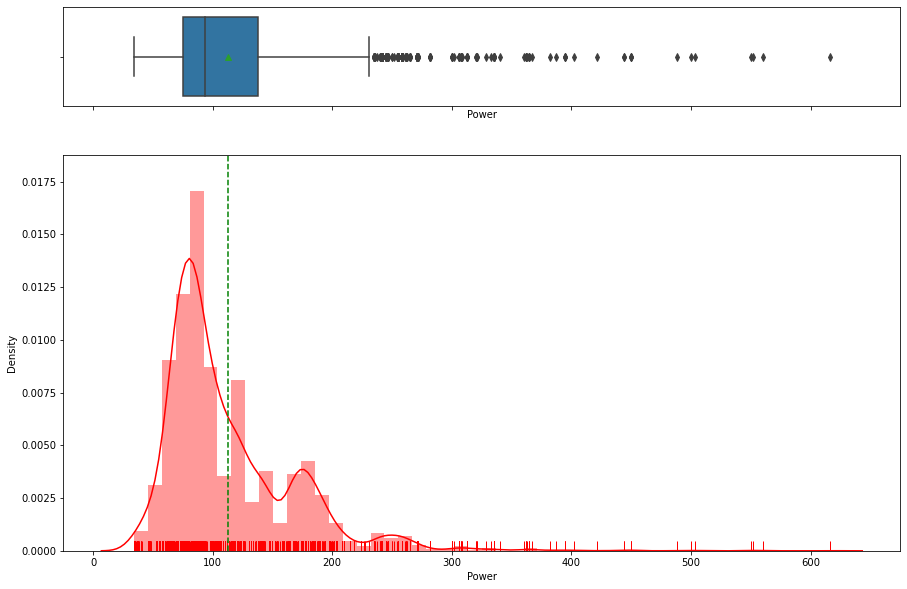

In [28]:
hist_box(df.Power)

- Power has right skew data

In [29]:
# Function to return the percentage of categorical variable
def bar_perc(plot, feature):
    
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),size = 15)

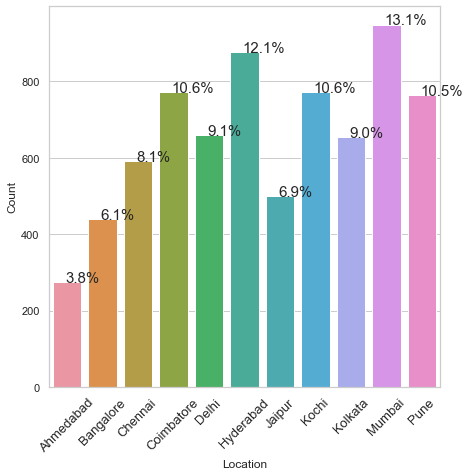

In [30]:
# Location count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['Location'])
plt.xlabel('Location')
plt.ylabel('Count')
bar_perc(ax,df['Location'])
plt.xticks(rotation =45,fontsize =13)
plt.show()

- Mumbai has highest number of cars and Ahmedabad has lowest

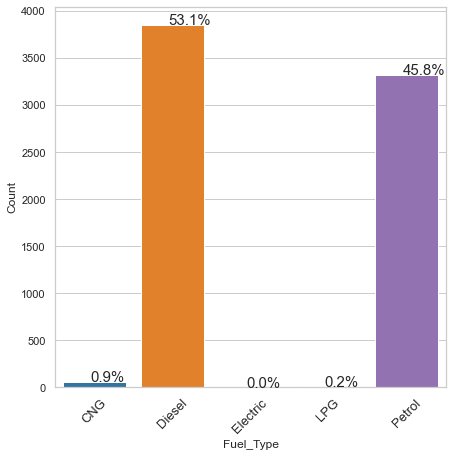

In [31]:
# Location count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['Fuel_Type'])
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
bar_perc(ax,df['Fuel_Type'])
plt.xticks(rotation =45,fontsize =13)
plt.show()

- Majority of the cars belongs to Diesel and Petrol.

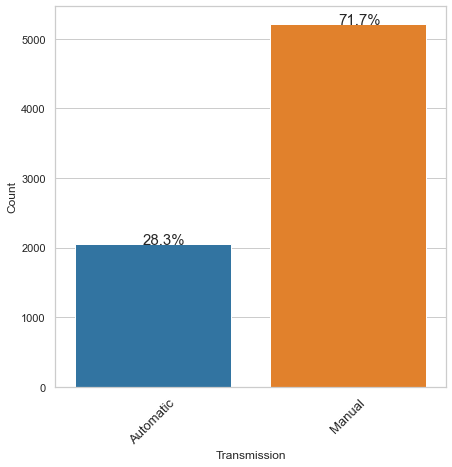

In [32]:
# Location count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['Transmission'])
plt.xlabel('Transmission')
plt.ylabel('Count')
bar_perc(ax,df['Transmission'])
plt.xticks(rotation =45,fontsize =13)
plt.show()

- Manuals cars are double when compared to Automatic cars

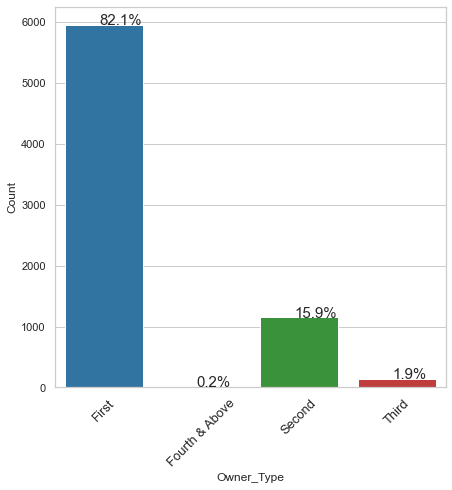

In [33]:
# Location count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['Owner_Type'])
plt.xlabel('Owner_Type')
plt.ylabel('Count')
bar_perc(ax,df['Owner_Type'])
plt.xticks(rotation =45,fontsize =13)
plt.show()

- First hand cars are of 82% and second hand cars are 16%

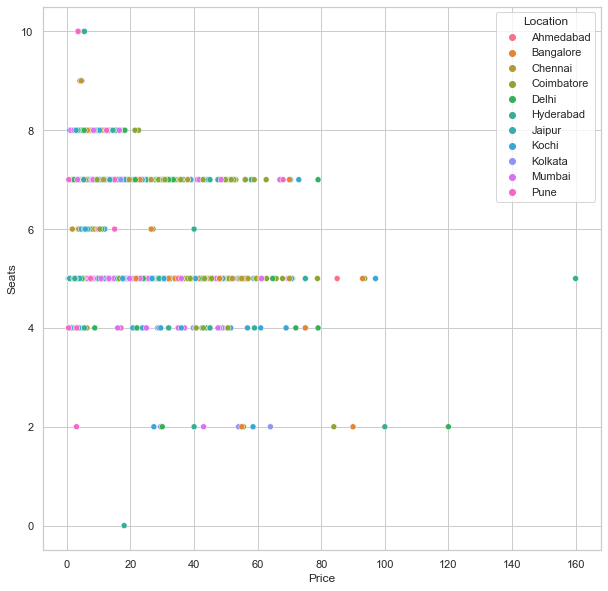

In [34]:
# Lets look visualize the relationship 
plt.figure(figsize=(10,10))
sns.scatterplot(y='Seats', x='Price', hue = 'Location', data=df);

- Good amount of cars has 5 and 7 seats

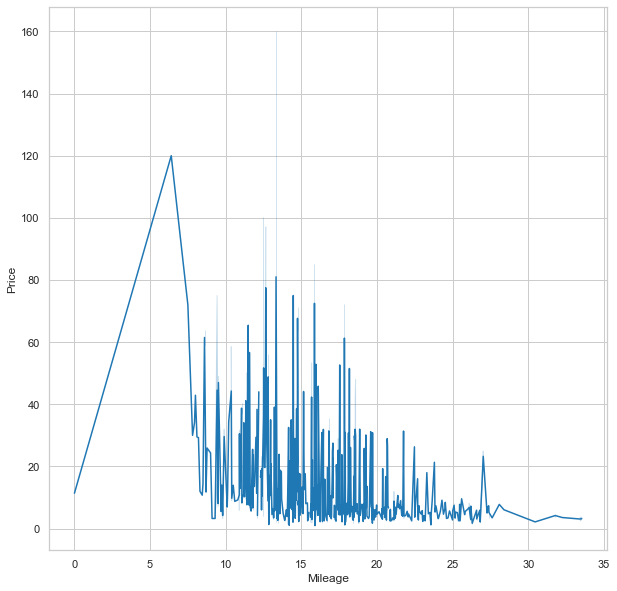

In [35]:
# Scatter plot for Price and Mileage

plt.figure(figsize=(10,10))
sns.lineplot(y='Price', x='Mileage', data=df);

- Less the mileage of the car , more price
- For majority of the cars , mileage is from 10 to 30.
- Only for couple of car's mileage is more than 30
- We do have incomplete values in the dataset , due to that couple of cars has 0 mileage

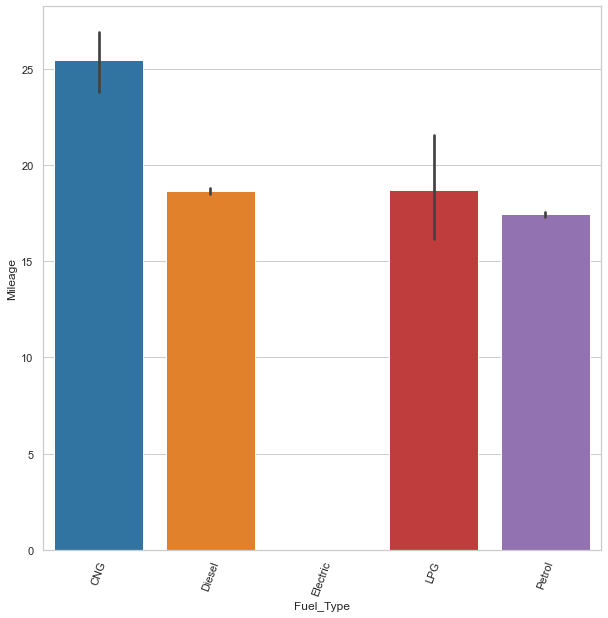

In [36]:
# Barplot for Mileage vs Fuel Type

plt.figure(figsize=(10,10))
sns.barplot(y='Mileage', x='Fuel_Type', data=df);
plt.xticks(rotation=70);

- CNG cars have more mileage when compared to all others.
- LPG and Diesel has almost same mileage
- Petrol has less mileage when compared to other fuel types

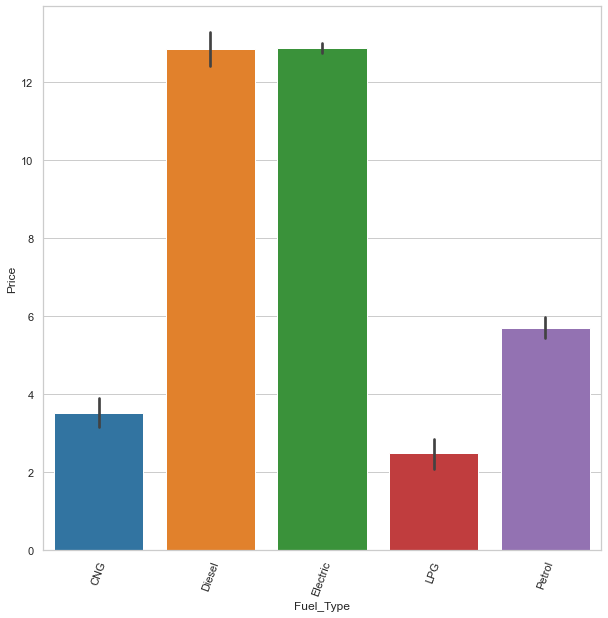

In [37]:
# Barplot Price vs Fuel Type

plt.figure(figsize=(10,10))
sns.barplot(y='Price', x='Fuel_Type', data=df);
plt.xticks(rotation=70);

- Deisel and Electric cars are bit costly when compared to other cars.
- LPG is less when compared to all other.

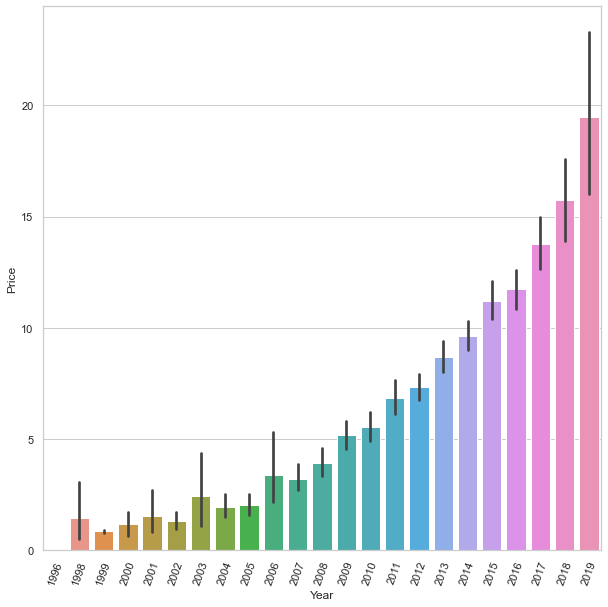

In [38]:
# Barplot for Price and Year

plt.figure(figsize=(10,10))
sns.barplot(y='Price', x='Year', data=df);
plt.xticks(rotation=70);

- High the year , more the price of the car. 
- 2019 cars has highest price in the given dataset.

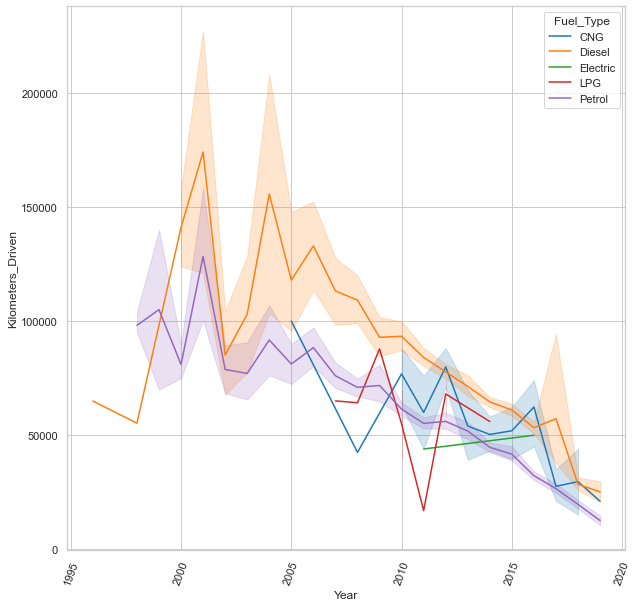

In [39]:
# Line plot for Kilometers_Driven and Year
plt.figure(figsize=(10,10))
sns.lineplot(y='Kilometers_Driven', x='Year', hue = 'Fuel_Type', data=df);
plt.xticks(rotation=70);

- Cars with 2015 and greater , drove less miles when compared to others.
- Diesel cars drove more miles when compared to all other cars

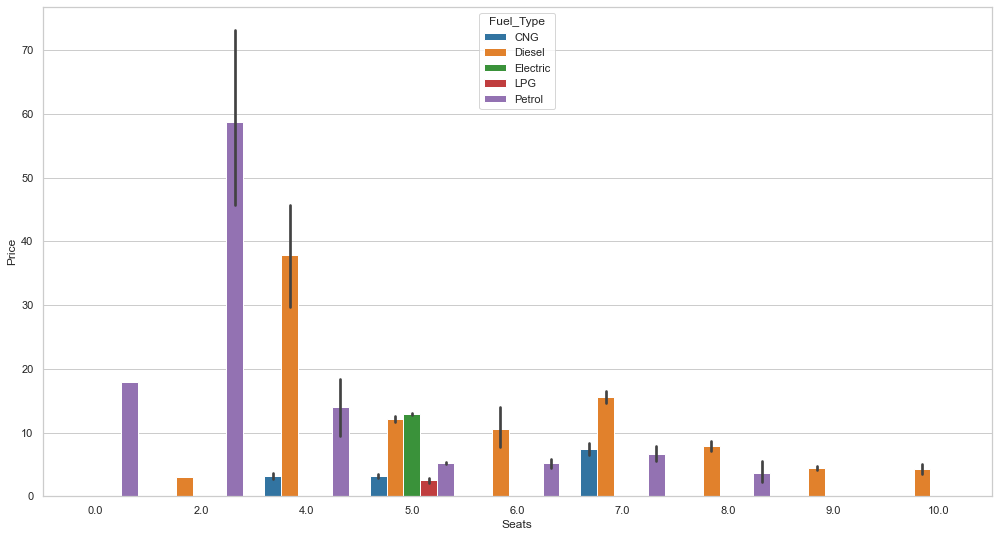

In [40]:
# Box plot for Price and Seat

plt.figure(figsize=(17,9))
sns.barplot(y="Price",x="Seats",data=df,hue = 'Fuel_Type')
plt.show()

- Petrol cars with 2 seats are costly when compared to all others , maybe these are sports cars.
- Diesel cars with 4 seats are next in line.

In [41]:
# Correlation table
df.corr() * 100

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,100.000,-18.786,32.246,-5.469,1.343,0.822,-1.347,30.533
Kilometers_Driven,-18.786,100.000,-6.912,9.482,3.016,9.022,1.570,-1.149
Mileage,32.246,-6.912,100.000,-59.357,-53.177,-31.063,-34.638,-30.659
Engine,-5.469,9.482,-59.357,100.000,85.977,39.926,58.391,65.835
Power,1.343,3.016,-53.177,85.977,100.000,9.590,68.748,77.257
Seats,0.822,9.022,-31.063,39.926,9.590,100.000,0.192,5.223
New_Price,-1.347,1.570,-34.638,58.391,68.748,0.192,100.000,68.659
Price,30.533,-1.149,-30.659,65.835,77.257,5.223,68.659,100.000


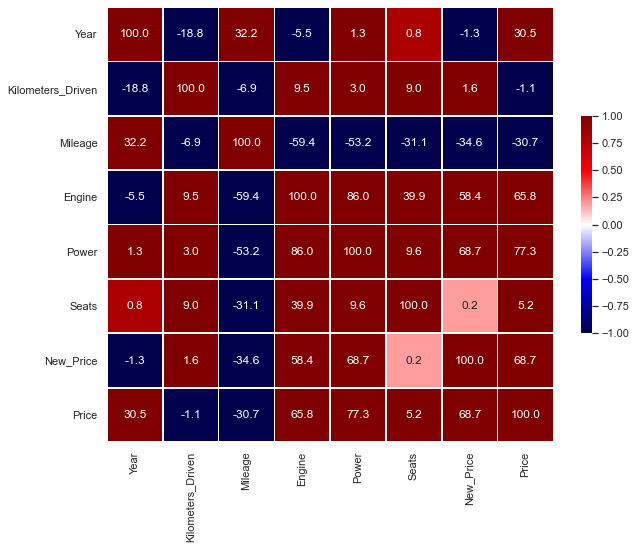

In [42]:
# Correlation plot for all numeric variables
plt.figure(figsize=(10,8))
corr = df.corr()
corr = corr * 100 # percentage conversion
mask = np.zeros_like(corr,dtype=np.bool) # To remove the other half which is duplicate
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr,annot=True,fmt='.0f', mask=mask);
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

- Majority of the variables are not correlated.
- Power and New Price are correlated. Maybe one variable can be removed.
- Power and Engine has correlation value of 86% , which means to say they are correlated.

# 5 Data Preperation

In [43]:
# Creation of dummy variables for Transmission
df = pd.get_dummies(df, columns=['Transmission'], drop_first=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Manual
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,First,26.600,998.000,58.160,5.000,nan,1.750,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,First,19.670,1582.000,126.200,5.000,nan,12.500,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,First,18.200,1199.000,88.700,5.000,8.610,4.500,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,First,20.770,1248.000,88.760,7.000,nan,6.000,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Second,15.200,1968.000,140.800,5.000,nan,17.740,0


In [44]:
# Converting the string values to numbers for model processing.

df['Fuel_Type'] = df['Fuel_Type'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4})
df['Owner_Type'] = df['Owner_Type'].map({'First':1,'Second':2,'Third':3,'Fourth & Above':4})
df['Location'] = df['Location'].map({'Mumbai':1,'Pune':2,'Chennai':3,'Coimbatore':4,'Hyderabad':5,'Jaipur':6,'Kochi':7, 'Kolkata':8, 'Delhi':9, 'Bangalore':10, 'Ahmedabad':11})
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Manual
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,1,2010,72000,3.000,1,26.600,998.000,58.160,5.000,nan,1.750,1
1,Hyundai Creta 1.6 CRDi SX Option,2,2015,41000,1.000,1,19.670,1582.000,126.200,5.000,nan,12.500,1
2,Honda Jazz V,3,2011,46000,2.000,1,18.200,1199.000,88.700,5.000,8.610,4.500,1
3,Maruti Ertiga VDI,3,2012,87000,1.000,1,20.770,1248.000,88.760,7.000,nan,6.000,1
4,Audi A4 New 2.0 TDI Multitronic,4,2013,40670,1.000,2,15.200,1968.000,140.800,5.000,nan,17.740,0


# 5 Missing values

In [45]:
# counting the number of missing values per row
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

1    5231
2    1125
0     823
4      36
3      28
5      10
dtype: int64

In [46]:
# Rows with 4 missing values
df[num_missing == 4].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Manual
S.No.,,,,,,,,,,,,,
4229,Hyundai Santro Xing XG,10,2005,79000,2.000,2,17.000,nan,nan,nan,nan,1.650,1
4577,BMW 5 Series 520d Sedan,9,2012,72000,1.000,3,18.480,nan,nan,nan,nan,13.850,0
3810,Honda CR-V AT With Sun Roof,8,2013,27000,2.000,1,14.000,nan,nan,nan,nan,11.990,0
733,Maruti Swift 1.3 VXi,3,2006,97800,2.000,3,16.100,nan,nan,nan,nan,1.750,1
4712,Hyundai Santro Xing XG,2,2003,80000,2.000,2,17.000,nan,nan,nan,nan,0.900,1


In [47]:
# Missing Values
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NANs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NANs are found in:
New_Price    5049
Price         182
dtype: int64



For the rows with exactly 2 missing values, NANs are found in:
Fuel_Type       1
Mileage         1
Power         103
Seats           2
New_Price    1124
Price        1019
dtype: int64



For the rows with exactly 3 missing values, NANs are found in:
Fuel_Type     1
Mileage       1
Power        26
Seats         5
New_Price    28
Price        23
dtype: int64



For the rows with exactly 4 missing values, NANs are found in:
Engine       36
Power        36
Seats        36
New_Price    36
dtype: int64



For the rows with exactly 5 missing values, NANs are found in:
Engine       10
Power        10
Seats        10
New_Price    10
Price        10
dtype: int64





In [48]:
# Fill all the NAN with median value. 
# Reshape the values from -1 to 1

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['Engine'] = imputer.fit_transform(df['Engine'].values.reshape(-1, 1))
df['Power'] = imputer.fit_transform(df['Power'].values.reshape(-1, 1))
df['Mileage'] = imputer.fit_transform(df['Mileage'].values.reshape(-1, 1))
df['Seats'] = imputer.fit_transform(df['Seats'].values.reshape(-1, 1))
df['Price'] = imputer.fit_transform(df['Price'].values.reshape(-1, 1))
df['Fuel_Type'] = imputer.fit_transform(df['Fuel_Type'].values.reshape(-1, 1))

# 6 Outliers Tretment

In [49]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [50]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

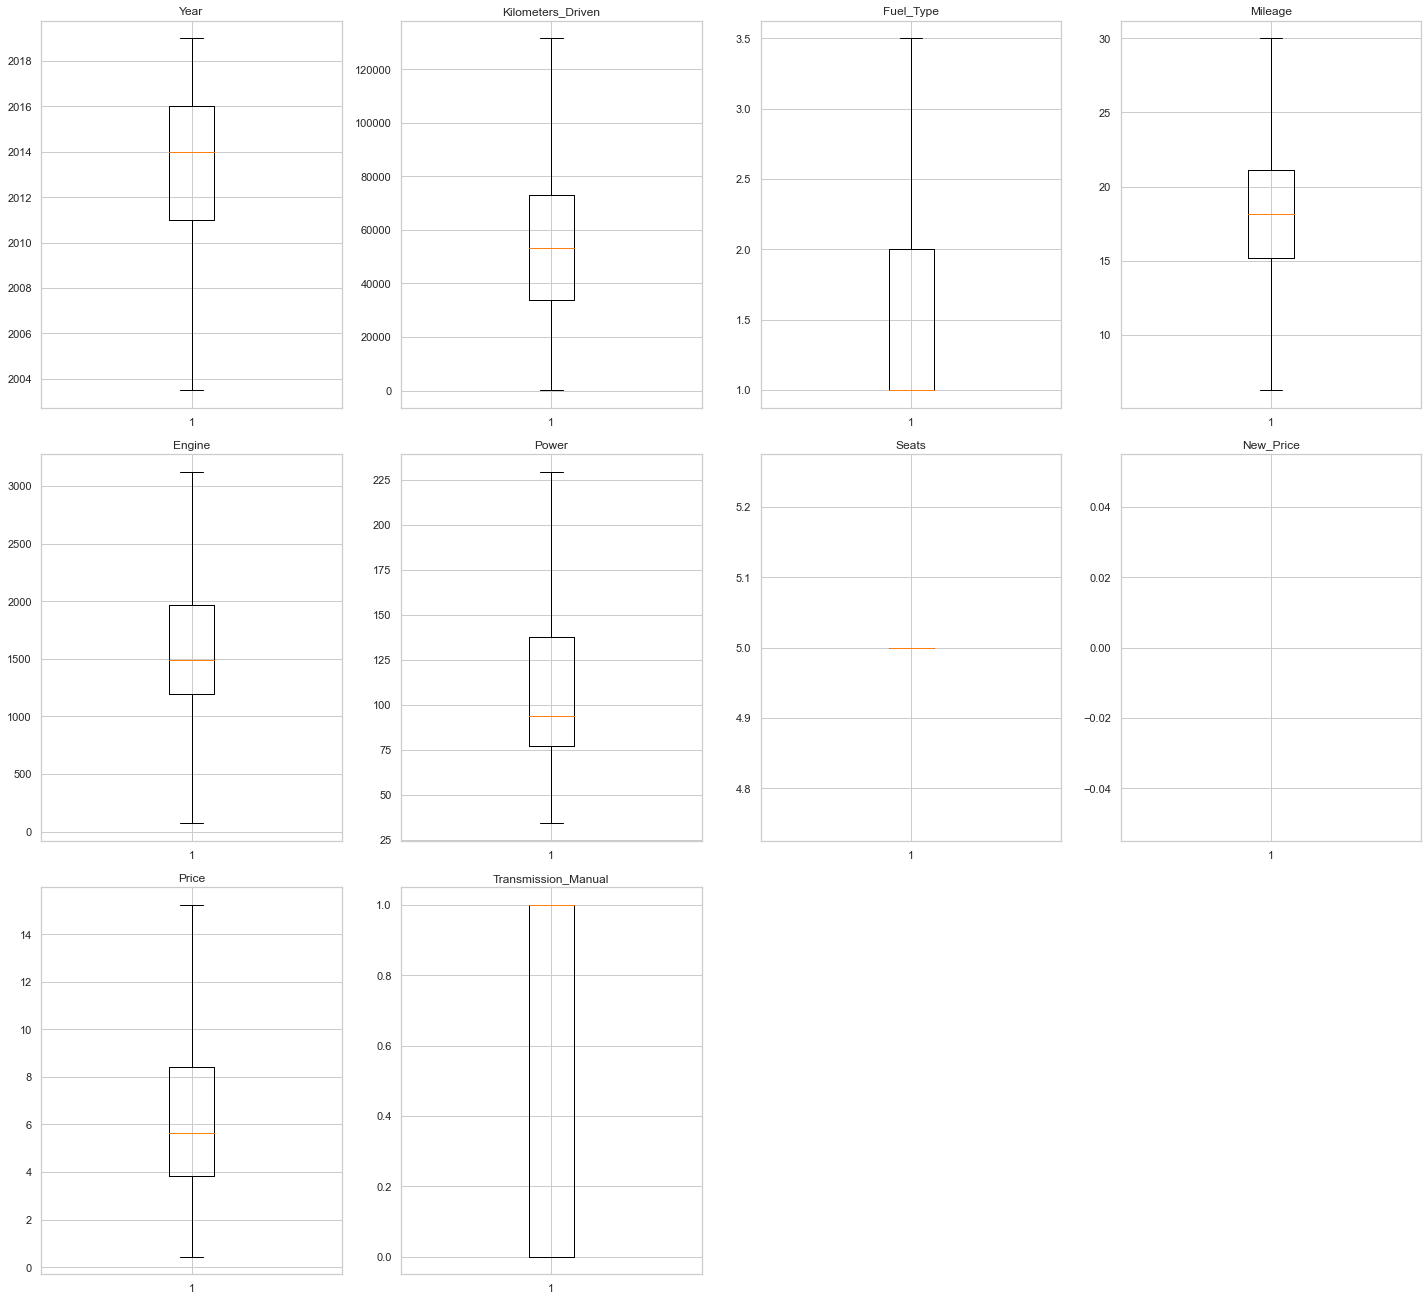

In [51]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [52]:
# removing unwanted colums , Name and NewPrice are not required.
# df.drop(['Name','New_Price'], axis = 1 , inplace = True) 
df['Current_Year'] = 2020
df['Number_Years'] = df['Current_Year'] - df['Year']
df.drop(['Name','Year','Current_Year','New_Price'],axis = 1 , inplace = True)

In [53]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,Transmission_Manual,Number_Years
S.No.,,,,,,,,,,,
0,1,72000,3.000,1,26.600,998.000,58.160,5.000,1.750,1,10.000
1,2,41000,1.000,1,19.670,1582.000,126.200,5.000,12.500,1,5.000
2,3,46000,2.000,1,18.200,1199.000,88.700,5.000,4.500,1,9.000
3,3,87000,1.000,1,20.770,1248.000,88.760,5.000,6.000,1,8.000
4,4,40670,1.000,2,15.200,1968.000,140.800,5.000,15.225,0,7.000


# 7 Data Transformation

In [54]:
# Remove skewness in the data by log transformation
df['Power'] = np.log1p(df.Power)
df['Price'] = np.log1p(df.Price)
df['Engine'] = np.log1p(df.Engine)
df['Kilometers_Driven'] = np.log1p(df.Kilometers_Driven)
# df['Year'] = np.log1p(df.Year)

df = np.log1p(df)
df = df.replace('?', np.nan)

In [55]:
df.isnull().sum().sort_values(ascending=False) # Missing values after data preprocessing

Number_Years           0
Transmission_Manual    0
Price                  0
Seats                  0
Power                  0
Engine                 0
Mileage                0
Owner_Type             0
Fuel_Type              0
Kilometers_Driven      0
Location               0
dtype: int64

# 8 Model Building

In [56]:
Y = df['Price'].values    # Output variable
X = df.drop(columns = {'Price'}).values   # Independent variable

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=10)

In [57]:
#intialise the model to be fit and fir the model on the train data
regression_model = LinearRegression(fit_intercept=True);
regression_model.fit(X_train, y_train);

In [58]:
print("Intercept of the linear equation:", regression_model.intercept_) 
print("\nCOefficients of the equation are:", regression_model.coef_) # COefficients of the model

Intercept of the linear equation: -1.9360250349543735

COefficients of the equation are: [-1.30208151e-03  5.50566771e-03 -1.09836053e-01 -6.88560488e-02
  1.86600506e-02  7.57775893e-01  1.06516093e+00  5.55111512e-17
 -8.08204074e-02 -1.69795702e-01]


# Model performance evaluation

In [59]:
# run the model on training data
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.6624547434927543


In [60]:
# Run the model on test data
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.6795654977712372


## Observations

- Performance of the model on training data is 71 , where as on test data is 73%. 
- it looks like liner regression model is able to predict the car price , may be some other regression model would perform even more well.

In [61]:
pred = regression_model.predict(X_test) 
pred

array([0.97745998, 1.05434528, 1.10429966, ..., 1.06231099, 0.97941809,
       1.18271795])

In [62]:
mean_absolute_error(y_test, pred) # Absolute Error 

0.0814270846494462

In [63]:
mean_squared_error(y_test, pred)**0.5 # Mean Square Error

0.10773040409886195

# Conclusion

- The training and testing scores are 71% and 73%, and both scores are comparable. Hence, the model is a good fit.

- $R^2$ is 0.71, that explains 71% of total variation in the dataset. So, overall the model is very satisfactory.

# Actionable Insights & Recommendations

* Now this is our final model which follows all the assumptions and this can be used for interpretations

- Car Price come out to be very significant, as expected. variables - New Price and Name of the car is not required to predict the price of the car. 
- Higher the mileage , Price of the car is less.
- Year 2015 and high has less number of kilometers when compared to others as expected. 
- Less the mileage of the car , more price
- For majority of the cars , mileage is from 10 to 30 just for few cars mileage is more than 30
- CNG cars have more mileage when compared to all others , after that LPG and Diesel has almost same mileage when compare to all other Petrol has less mileage.
- Diesel and Electric cars are a bit costly, LPG is less when compared to all others.
- Cars with 2015 and greater year, drove less miles when compared to others.
- Diesel cars drove more miles when compared to all other cars
- Petrol cars with 2 seats are costly when compared to all others , maybe these are sports cars.Diesel cars with 4 seats are next in line.
- Power and New Price are correlated. Maybe one variable can be removed.
- Power and Engine has correlation value of 86% , which means to say they also correlated.

Less number of Years , less mileage cars has more value.

In [64]:
# Lets us build linear regression model using statsmodel 
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1089.
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        20:46:46   Log-Likelihood:                 4031.2
No. Observations:                5077   AIC:                            -8042.
Df Residuals:                    5067   BIC:                            -7977.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0014      0.003     -0.514      0.6

# Observation
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, car price deceases with their increase.
- Positive values of coefficient shows that, car price inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 

In [65]:
df = pd.read_csv('/Users/sundeep/Learnings/1_PGP_DSBA/Project/6_Cars4U/used_cars_data.csv',index_col=0)

df['Mileage'] = df['Mileage'].str.strip(' kmpl')
df['Mileage'] = df['Mileage'].str.strip(' km/kg')
df['Engine']  = df['Engine'].str.strip(' CC')
df['Power']   = df['Power'].str.strip(' bhp')
df['New_Price']   = df['New_Price'].str.strip(' Lakh')
df['New_Price']   = df['New_Price'].str.strip(' Cr')

df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine']  = pd.to_numeric(df['Engine'], errors='coerce')
df['Power']   = pd.to_numeric(df['Power'], errors='coerce')
df['Seats']   = pd.to_numeric(df['Seats'], errors='coerce')
df['New_Price']   = pd.to_numeric(df['New_Price'], errors='coerce')

df = pd.get_dummies(df, columns=['Transmission'], drop_first=True)
df['Fuel_Type'] = df['Fuel_Type'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4})
df['Owner_Type'] = df['Owner_Type'].map({'First':1,'Second':2,'Third':3,'Fourth & Above':4})
df['Location'] = df['Location'].map({'Mumbai':1,'Pune':2,'Chennai':3,'Coimbatore':4,'Hyderabad':5,'Jaipur':6,'Kochi':7, 'Kolkata':8, 'Delhi':9, 'Bangalore':10, 'Ahmedabad':11})

df.drop(['Name'],axis = 1, inplace = True)
df.drop(['New_Price'],axis = 1, inplace = True)

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['Engine'] = imputer.fit_transform(df['Engine'].values.reshape(-1, 1))
df['Power'] = imputer.fit_transform(df['Power'].values.reshape(-1, 1))
df['Mileage'] = imputer.fit_transform(df['Mileage'].values.reshape(-1, 1))
df['Seats'] = imputer.fit_transform(df['Seats'].values.reshape(-1, 1))
df['Price'] = imputer.fit_transform(df['Price'].values.reshape(-1, 1))
df['Fuel_Type'] = imputer.fit_transform(df['Fuel_Type'].values.reshape(-1, 1))

Y = df['Price']
X = df.drop(columns = {'Price'})
X

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Location                4.229
Year                  231.436
Kilometers_Driven       1.537
Fuel_Type              14.707
Owner_Type              8.258
Mileage                34.698
Engine                 62.000
Power                  32.732
Seats                  74.649
Transmission_Manual     6.291
dtype: float64



In [67]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train.drop('Year', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Location               4.121
Kilometers_Driven      3.905
Fuel_Type              8.668
Owner_Type             8.163
Mileage               14.812
Engine                63.303
Power                 32.333
Seats                 52.114
Transmission_Manual    6.297
dtype: float64



In [68]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.733
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              1549.
Date:                Fri, 07 May 2021   Prob (F-statistic):                        0.00
Time:                        20:46:46   Log-Likelihood:                         -16991.
No. Observations:                5077   AIC:                                  3.400e+04
Df Residuals:                    5068   BIC:                                  3.406e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

- Adjusted R2 got increased to 73% after the removal of Year variable

# Now we'll check rest of the assumptions on model - olsres1
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

### Mean of residuals should be 0

In [69]:
residual= olsres1.resid
np.mean(residual)

0.016849981957762633

* Mean of redisuals is very close to 0.

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [70]:
residual=olsres1.resid
fitted=olsres1.fittedvalues #predicted values

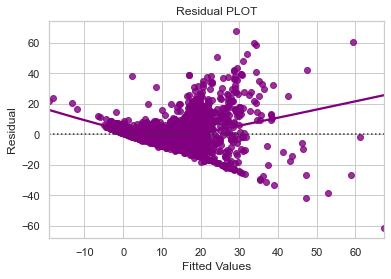

In [71]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - There exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual hence 1st assumptions is satisfied

### TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

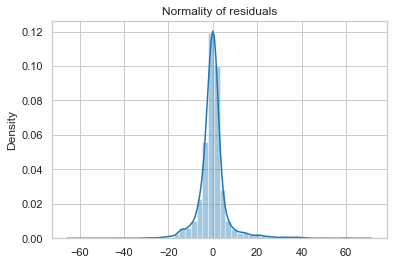

In [72]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

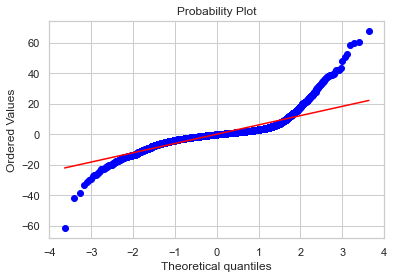

In [73]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [74]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)

[('F statistic', 1.1721980958675327), ('p-value', 3.263305693715596e-05)]

Since p-value < 0.05 we can say that the residuals are not homoscedastic. This assumption is therefore not valid in the data.

# Appendix:


- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LinearRegression** : Ordinary least squares Linear Regression.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

- **statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    - An extensive list of result statistics are available for each estimator.
    - The results are tested against existing statistical packages to ensure that they are correct.
    - The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html).